# Exploring Network Changes

## Overview

## Packages used
- [NetworkX](https://networkx.github.io)
- [Matplotlib](https://matplotlib.org)
- [Louvain Community Detection (python-louvain)](https://github.com/taynaud/python-louvain)
- [CluSim: a package for calculating clustering similarity](https://github.com/Hoosier-Clusters/clusim)
- [qgrid](https://github.com/quantopian/qgrid) to view and edit DataFrame
- pandas
- numpy
- [plotly](https://plot.ly/python/)

## ToDo List

- replace plotly with ... ???
- utilize Alex's Python wrapper around Louvain
- collapse time sequence into a series of function calls
  - how to represent temporal slices efficiently
  - how to edit/change temporal slices easily
- plot temporal sequence of network as small multiples (or tiled plots in Matplotlib)
- load network data from external source (CSV file)

# The progression of time...

In [1]:
import networkx as nx
import community as louvain
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim
from matplotlib import pyplot as plt

%matplotlib inline

DendroPY not supported.


In [2]:
def membership(d):
    _membership = {}
    for key in d.keys():
        value = d[key]
        _membership[key] = [value]
    return _membership

In [3]:
def summary(graph, communities, clustering):
    print("membership:", membership(communities))
    print("clustering: ", end="")
    print_clustering(clustering)

some articles on coloring:
- [Python NetworkX — set node color automatically based on number of attribute options](https://stackoverflow.com/questions/28910766/python-networkx-set-node-color-automatically-based-on-number-of-attribute-opt)
- [Matplotlib discrete colorbar](https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar)

In [4]:
colors = {
    0: "red",
    1: "blue",
    2: "purple",
    3: "green",
    4: "black"
}

def coloring(membership):
    _coloring = []
    for m in membership:
        _coloring.append(colors[membership[m]])
    return _coloring

In [5]:
def plot(graph, membership):
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labeltop=False,
        labelleft=False,
        labelright=False)
    nx.draw_networkx(graph, 
                     pos=nx.spring_layout(graph), 
                     node_color=coloring(membership), 
                     font_color="white")

In [6]:
def delta(z1, z2):
    s1 = set(z1.keys())
    s2 = set(z2.keys())
    added = list(s2 - s1)
    removed = list(s1 - s2)
    print("nodes")
    print("\tadded:   ", added)
    print("\tremoved: ", removed)
    print("links")
    s3 = s1.intersection(s2)
    for n in s3:
        l1 = set(z1[n])
        l2 = set(z2[n])
        print("\tnode",n, "removed", list(l1 - l2), "added", list(l2 - l1))
    if len(added) > 0:
        print("new nodes")
        for n in s2 - s1:
            print("\tnode",n,"connected to", t4[n])

In [7]:
class Counter():
    count = 0
    
    def __init__(self, init=1):
        self.count = init-1
    
    def __call__(self):
        self.count += 1
        return self.count

## Time 1
Initial network with 10 nodes. There are two distinctly identifiable groups connected through a single link.

In [8]:
t1 = {
    0: [1,2,3,4],
    1: [0,2,4],
    2: [0,1],
    3: [0,4],
    4: [0,2,3,5],
    5: [4,6,8],
    6: [5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [6]
}

membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [0], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1]}
clustering: 01234|56789


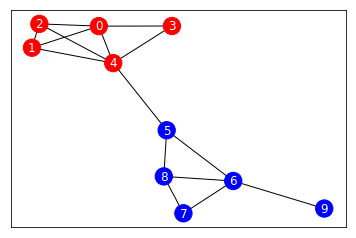

In [9]:
Gt1 = nx.from_dict_of_lists(t1)
Mt1 = louvain.best_partition(Gt1)
Ct1 = Clustering(elm2clu_dict = membership(Mt1))
summary(Gt1, Mt1, Ct1)
plot(Gt1, Mt1)

## Time 2
A third group emerges as node `4` forms new connections to `6` and `9`, and drops all but one previous connection.

In [10]:
t2 = {
    0: [1,2,3,4],
    1: [0,2],
    2: [0,1,3],
    3: [0,2],
    4: [0,6,9],
    5: [6,8],
    6: [4,5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [4,6]
}

In [11]:
delta(t1, t2)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [4] added []
	node 2 removed [] added [3]
	node 3 removed [4] added [2]
	node 4 removed [2, 3, 5] added [9, 6]
	node 5 removed [4] added []
	node 6 removed [] added [4]
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added [4]


membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [1], 5: [2], 6: [2], 7: [2], 8: [2], 9: [1]}
clustering: 0123|94|8567


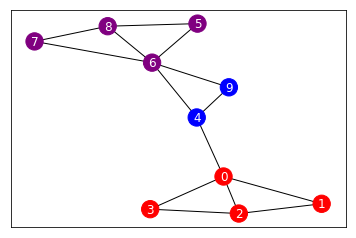

In [12]:
Gt2 = nx.from_dict_of_lists(t2)
Mt2 = louvain.best_partition(Gt2)
Ct2 = Clustering(elm2clu_dict = membership(Mt2))
summary(Gt2, Mt2, Ct2)
plot(Gt2, Mt2)

## Time 3
The third groups begins to expand, with nodes `3` and `6` moving away from their previous groups and forming more links within their own group.

In [13]:
t3 = {
    0: [1,2,4],
    1: [0,2],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6]
}

In [14]:
delta(t2, t3)

nodes
	added:    []
	removed:  []
links
	node 0 removed [3] added []
	node 1 removed [] added []
	node 2 removed [3] added []
	node 3 removed [0, 2] added [9, 4, 6]
	node 4 removed [] added [3]
	node 5 removed [] added [7]
	node 6 removed [8, 7] added [3]
	node 7 removed [6] added [5]
	node 8 removed [6] added []
	node 9 removed [] added [3]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1]}
clustering: 012|9346|857


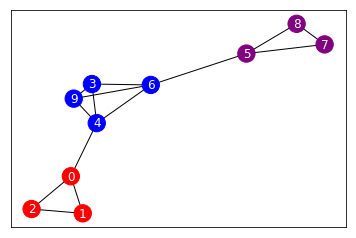

In [15]:
Gt3 = nx.from_dict_of_lists(t3)
Mt3 = louvain.best_partition(Gt3)
Ct3 = Clustering(elm2clu_dict = membership(Mt3))
summary(Gt3, Mt3, Ct3)
plot(Gt3, Mt3)

## Time 4
Two new nodes arrive, `10` and `11`, initially connecting to node `1` and each other.

In [16]:
t4 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6],
    10: [1,11],
    11: [1,10]
}

In [17]:
delta(t3, t4)

nodes
	added:    [10, 11]
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added [10, 11]
	node 2 removed [] added []
	node 3 removed [] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [] added []
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added []
new nodes
	node 10 connected to [1, 11]
	node 11 connected to [1, 10]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1], 10: [0], 11: [0]}
clustering: 0121011|9346|857


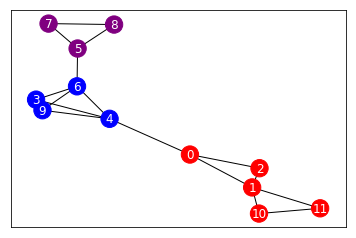

In [18]:
Gt4 = nx.from_dict_of_lists(t4)
Mt4 = louvain.best_partition(Gt4)
Ct4 = Clustering(elm2clu_dict = membership(Mt4))
summary(Gt4, Mt4, Ct4)
plot(Gt4, Mt4)

## Time 5
A fourth group emerges with three nodes: `8`, `10`, and `11`. Additionally, with a few more link additions and removals the other groups also balance out to three nodes. 

In [19]:
t5 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [4,5,7,9],
    7: [5,6],
    8: [5,10,11],
    9: [3,4,6],
    10: [1,8,11],
    11: [1,8,10]
}

In [20]:
delta(t4, t5)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added []
	node 2 removed [] added []
	node 3 removed [6] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [3] added [7]
	node 7 removed [8] added [6]
	node 8 removed [7] added [10, 11]
	node 9 removed [] added []
	node 10 removed [] added [8]
	node 11 removed [] added [8]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [2], 7: [2], 8: [3], 9: [1], 10: [3], 11: [3]}
clustering: 012|934|567|81011


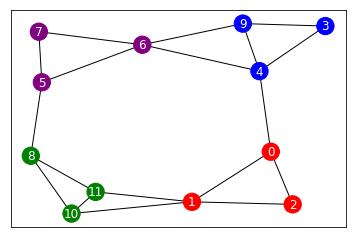

In [21]:
Gt5 = nx.from_dict_of_lists(t5)
Mt5 = louvain.best_partition(Gt5)
Ct5 = Clustering(elm2clu_dict = membership(Mt5))
summary(Gt5, Mt5, Ct5)
plot(Gt5, Mt5)

## Time 6
a subtraction (remove a node)

In [22]:
t6 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,9],
    4: [0,3,9],
    5: [7,8],
    7: [5],
    8: [5,10,11],
    9: [3,4],
    10: [1,8,11],
    11: [1,8,10]
}

In [23]:
delta(t5, t6)

nodes
	added:    []
	removed:  [6]
links
	node 0 removed [] added []
	node 1 removed [] added []
	node 2 removed [] added []
	node 3 removed [] added []
	node 4 removed [6] added []
	node 5 removed [6] added []
	node 7 removed [6] added []
	node 8 removed [] added []
	node 9 removed [6] added []
	node 10 removed [] added []
	node 11 removed [] added []


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 7: [2], 8: [2], 9: [1], 10: [2], 11: [2]}
clustering: 012|934|5781011


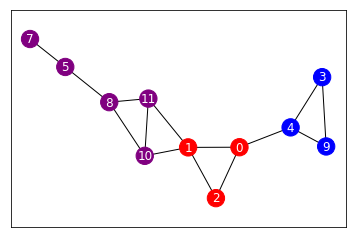

In [24]:
Gt6 = nx.from_dict_of_lists(t6)
Mt6 = louvain.best_partition(Gt6)
Ct6 = Clustering(elm2clu_dict = membership(Mt6))
summary(Gt6, Mt6, Ct6)
plot(Gt6, Mt6)

# Comparing Clustering

In [25]:
elementScores, relabeled_elements = sim.element_sim_elscore(Ct1, Ct2, alpha = 0.9)

In [26]:
print(relabeled_elements)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [27]:
print("{0:6s}  {1:6s}".format("Node", "Score"))
print("------  ------")
for e in relabeled_elements:
    loc = relabeled_elements[e]
    print("{0:6d}  {1:2.3f}".format(e,elementScores[loc]))

Node    Score 
------  ------
     0  0.800
     1  0.800
     2  0.800
     3  0.800
     4  0.200
     5  0.800
     6  0.800
     7  0.800
     8  0.800
     9  0.200


In [28]:
cont_table = sim.contingency_table(Ct1, Ct2)

In [29]:
print(cont_table)

[[4, 1, 0], [0, 1, 4]]


In [30]:
N11, N10, N01, N00 = sim.count_pairwise_cooccurence(Ct1, Ct2)
print(N11,
        "element pairs assigned to the same clusters in both clusterings")
print(N10,
        "element pairs assigned to the same clusters in clustering1, but "
        "different clusters in clustering2")
print(N01, "element pairs assigned to different clusters in "
               "clustering1, but the same clusters in clustering2")
print(N00, "element pairs assigned to different clusters in both "
               "clusterings")

12.0 element pairs assigned to the same clusters in both clusterings
8.0 element pairs assigned to the same clusters in clustering1, but different clusters in clustering2
1.0 element pairs assigned to different clusters in clustering1, but the same clusters in clustering2
24.0 element pairs assigned to different clusters in both clusterings


# Lists of Data

In [31]:
graphs = [Gt1, Gt2, Gt3, Gt4, Gt5, Gt6]
modularities = [Mt1, Mt2, Mt3, Mt4, Mt5, Mt6]
clusterings = [Ct1, Ct2, Ct3, Ct4, Ct5, Ct6]

# Viewing Change in Clustering

## prepare the data

In [32]:
import pandas as pd
import numpy as np
import qgrid

### Build a DataFrame with cluster assignments

In [33]:
import itertools

colNames = ["Node"]
nodes = sorted(set(itertools.chain.from_iterable([list(m.keys()) for m in modularities])))

In [34]:
df = pd.DataFrame(columns=colNames)

In [35]:
df.Node = nodes

In [36]:
timex = Counter(1)
missing = -1

# ToDo: this needs to handle missing in terms of:
#  - nodes missing because they were not present in the time slice
#  - nodes that were presend, but are now deleted

def addTimeSlice(ts, df):
    time = "T{}".format(timex())
    v = []
    for i in df.Node:
        if i in ts:
            v.append(ts[i])
        else:
            v.append(missing)
    print(time, v)
    df[time] = v

In [37]:
for ts in modularities:
    addTimeSlice(ts, df)

T1 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, -1, -1]
T2 [0, 0, 0, 0, 1, 2, 2, 2, 2, 1, -1, -1]
T3 [0, 0, 0, 1, 1, 2, 1, 2, 2, 1, -1, -1]
T4 [0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0]
T5 [0, 0, 0, 1, 1, 2, 2, 2, 3, 1, 3, 3]
T6 [0, 0, 0, 1, 1, 2, -1, 2, 2, 1, 2, 2]


In [38]:
w = qgrid.show_grid(df, show_toolbar=True)
w

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [39]:
df

`computeFlows`

- returns a `dict` that contains flow information between two time slices
  - sources
  - targets
  - labels
  - flows

In [40]:
def computeFlows(d1, d2, data, index):
    if len(data['targets']) > 0:
        data['sources'] = data['targets']
        data['targets'] = {}
        data['labels'] = []
        data['flows'] = {}
    
    for i in range(len(d1)):
        source = d1[i]
        target = d2[i]

        if source < 0 or target < 0:
            continue

        if source in data['sources']:
            source_index = data['sources'][source]['index']
        else:
            source_index = index()
            data['sources'][source] = {'index': source_index, 'label': source}
            data['labels'].append(source)

        if target in data['targets']:
            target_index = data['targets'][target]['index']
        else:
            target_index = index()
            data['targets'][target] = {'index': target_index, 'label': target}
            data['labels'].append(target)

        flow = "{} -> {}".format(source_index, target_index)

        print("source: {} target: {} flow: {}".format(source, target, flow))

        if flow in data['flows']:
            data['flows'][flow] += 1
        else:
            data['flows'][flow] = 1

`analyzeFlows`

given **flow** information, produces separate arrays for labels, colors, sources, targets, values

In [41]:
colorMap = {
    0: "red",
    1: "blue",
    2: "magenta",
    3: "green",
    4: "yellow",
    5: "orange"
}

In [42]:
def analyzeFlows(data):
    labels = data['labels']
    colors = [colorMap[x] for x in data['labels']]
    sources = []
    targets = []
    values = []
    for flow in data['flows']:
        src = flow.split()[0]
        dst = flow.split()[2]
        sources.append(src)
        targets.append(dst)
        values.append(data['flows'][flow])
    return labels, colors, sources, targets, values

process the temporal network data: compute and extract flow information

In [43]:
data = {
    'sources': {},
    'targets': {},
    'labels': [],
    'flows': {}
}

In [44]:
index = Counter(0)

In [45]:
labels = []
colors = []
sources = []
targets = []
values = []

In [46]:
timeColumns = list(filter(lambda x: x.startswith("T"), df.columns))

In [47]:
for i in range(len(timeColumns) - 1):
    j = i + 1
    t1 = timeColumns[i]
    t2 = timeColumns[j]
    d1 = df[t1].values
    d2 = df[t2].values
    print("Getting results for {} -> {}".format(t1,t2))
    print(t1,":",d1)
    print(t2,":",d2)
    computeFlows(d1, d2, data, index)
    print("computeFlows:")
    print(" sources:",data['sources'])
    print(" targets:",data['targets'])
    print(" labels:",data['labels'])
    print(" flows:",data['flows'])

    results = analyzeFlows(data)
    print("analyzeFlows:")
    [print(" ",x) for x in results]
    labels += results[0]
    colors += results[1]
    sources += results[2]
    targets += results[3]
    values += results[4]

Getting results for T1 -> T2
T1 : [ 0  0  0  0  0  1  1  1  1  1 -1 -1]
T2 : [ 0  0  0  0  1  2  2  2  2  1 -1 -1]
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 1 flow: 0 -> 2
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 1 flow: 3 -> 2
computeFlows:
 sources: {0: {'index': 0, 'label': 0}, 1: {'index': 3, 'label': 1}}
 targets: {0: {'index': 1, 'label': 0}, 1: {'index': 2, 'label': 1}, 2: {'index': 4, 'label': 2}}
 labels: [0, 0, 1, 1, 2]
 flows: {'0 -> 1': 4, '0 -> 2': 1, '3 -> 4': 4, '3 -> 2': 1}
analyzeFlows:
  [0, 0, 1, 1, 2]
  ['red', 'red', 'blue', 'blue', 'magenta']
  ['0', '0', '3', '3']
  ['1', '2', '4', '2']
  [4, 1, 4, 1]
Getting results for T2 -> T3
T2 : [ 0  0  0  0  1  2  2  2  2  1 -1 -1]
T3 : [ 0  0  0  1  1  2  1  2  2  1 -1 -1]
source: 0 target: 0 flow: 1 -> 5
sou

In [48]:
print("labels:", labels)
print("colors:", colors)
print("sources:", sources)
print("targets:", targets)
print("values:", values)

labels: [0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2]
colors: ['red', 'red', 'blue', 'blue', 'magenta', 'red', 'blue', 'magenta', 'red', 'blue', 'magenta', 'red', 'blue', 'magenta', 'green', 'red', 'blue', 'magenta']
sources: ['0', '0', '3', '3', '1', '1', '2', '4', '4', '5', '6', '7', '8', '9', '10', '9', '10', '8', '11', '12', '13', '14']
targets: ['1', '2', '4', '2', '5', '6', '6', '7', '6', '8', '9', '10', '11', '12', '13', '13', '14', '14', '15', '16', '17', '17']
values: [4, 1, 4, 1, 3, 1, 2, 3, 1, 3, 4, 3, 3, 3, 2, 1, 1, 2, 3, 3, 2, 3]


`plotFlow`

produce a *Sankey Diagram* from the flow information

Note: using Plotly requires:
1. signing up (there's a free option): https://plot.ly/api_signup
2. generating an API key: https://plot.ly/settings/api#/
   - which must be stored in `~/.plotly/.credentials`
   
```
{
    "username": "muftring",
    "api_key": "pLqC2SZPVIAuwyJQv3nS",
    "stream_ids": []
}
```

In [49]:
import plotly
plotly.tools.set_credentials_file(username='muftring', api_key='JZKR7bF7LAZWIYnSpXUQ')

In [50]:
import plotly.plotly as py

def plotFlow(labels, colors, sources, targets, values):
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labels,
          color = colors
        ),
        link = dict(
          source = sources,
          target = targets,
          value = values
      ))

    layout =  dict(
        title = "Title",
        font = dict(
          size = 10
        )
    )

    fig = dict(data=[data], layout=layout)
    return py.iplot(fig, validate=False)

In [51]:
plotFlow(labels, colors, sources, targets, values)

# Use `ipysankeywidget` and `floweaver`
- [`ipysankeywidget`](https://github.com/ricklupton/ipysankeywidget)
- [`floweaver`](https://github.com/ricklupton/floweaver)
  - [docs](https://floweaver.readthedocs.io/en/latest/index.html)

## ipysankeywidget

convenience function to produce diagram

In [70]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

In [71]:
layout = Layout(width="800", height="600")
def sankey(margin_top=10, **value):
    """Show SankeyWidget with default values for size and margins"""
    return SankeyWidget(layout=layout,
                        margins=dict(top=margin_top, bottom=0, left=30, right=60),
                        **value)

In [72]:
print("labels:", labels)
print("colors:", colors)
print("sources:", sources)
print("targets:", targets)
print("values:", values)

labels: [0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2]
colors: ['red', 'red', 'blue', 'blue', 'magenta', 'red', 'blue', 'magenta', 'red', 'blue', 'magenta', 'red', 'blue', 'magenta', 'green', 'red', 'blue', 'magenta']
sources: ['0', '0', '3', '3', '1', '1', '2', '4', '4', '5', '6', '7', '8', '9', '10', '9', '10', '8', '11', '12', '13', '14']
targets: ['1', '2', '4', '2', '5', '6', '6', '7', '6', '8', '9', '10', '11', '12', '13', '13', '14', '14', '15', '16', '17', '17']
values: [4, 1, 4, 1, 3, 1, 2, 3, 1, 3, 4, 3, 3, 3, 2, 1, 1, 2, 3, 3, 2, 3]


In [73]:
types = ['w','x', 'y', 'z']

In [74]:
type2Color = {
    'w': 'red',
    'x': 'blue',
    'y': 'magenta',
    'z': 'green'
}

In [75]:
nodes = []

In [76]:
for i in range(len(labels)):
    nodes.append({'id': str(i), 'title': str(labels[i])})

In [77]:
nodes

[{'id': '0', 'title': '0'},
 {'id': '1', 'title': '0'},
 {'id': '2', 'title': '1'},
 {'id': '3', 'title': '1'},
 {'id': '4', 'title': '2'},
 {'id': '5', 'title': '0'},
 {'id': '6', 'title': '1'},
 {'id': '7', 'title': '2'},
 {'id': '8', 'title': '0'},
 {'id': '9', 'title': '1'},
 {'id': '10', 'title': '2'},
 {'id': '11', 'title': '0'},
 {'id': '12', 'title': '1'},
 {'id': '13', 'title': '2'},
 {'id': '14', 'title': '3'},
 {'id': '15', 'title': '0'},
 {'id': '16', 'title': '1'},
 {'id': '17', 'title': '2'}]

In [78]:
links = []

In [79]:
for i in range(len(sources)):
    t = types[labels[int(sources[i])]]
    links.append({'source': sources[i], 'target': targets[i], 'value': values[i], 'type': t})

In [80]:
links

[{'source': '0', 'target': '1', 'value': 4, 'type': 'w'},
 {'source': '0', 'target': '2', 'value': 1, 'type': 'w'},
 {'source': '3', 'target': '4', 'value': 4, 'type': 'x'},
 {'source': '3', 'target': '2', 'value': 1, 'type': 'x'},
 {'source': '1', 'target': '5', 'value': 3, 'type': 'w'},
 {'source': '1', 'target': '6', 'value': 1, 'type': 'w'},
 {'source': '2', 'target': '6', 'value': 2, 'type': 'x'},
 {'source': '4', 'target': '7', 'value': 3, 'type': 'y'},
 {'source': '4', 'target': '6', 'value': 1, 'type': 'y'},
 {'source': '5', 'target': '8', 'value': 3, 'type': 'w'},
 {'source': '6', 'target': '9', 'value': 4, 'type': 'x'},
 {'source': '7', 'target': '10', 'value': 3, 'type': 'y'},
 {'source': '8', 'target': '11', 'value': 3, 'type': 'w'},
 {'source': '9', 'target': '12', 'value': 3, 'type': 'x'},
 {'source': '10', 'target': '13', 'value': 2, 'type': 'y'},
 {'source': '9', 'target': '13', 'value': 1, 'type': 'x'},
 {'source': '10', 'target': '14', 'value': 1, 'type': 'y'},
 {'sou

In [81]:
%%html
<style>
.sankey .node {
    font-family: "sans-serif";
    font-size: 24px;
    font-style: normal;
    font-weight: bold;
}
</style>

In [82]:
sankey(links=links, nodes=nodes, align_link_types=True)

SankeyWidget(align_link_types=True, layout=Layout(height='600', width='800'), links=[{'source': '0', 'target':…

# floweaver

In [83]:
flow_df = pd.DataFrame(columns=['source','target','type','value'])

In [84]:
flow_df.source = [link['source'] for link in links]
flow_df.target = [link['target'] for link in links]
flow_df.type = [link['type'] for link in links]
flow_df.value = [link['value'] for link in links]

In [85]:
flow_df_w = qgrid.show_grid(flow_df, show_toolbar=True)
flow_df_w

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [86]:
from ipysankeywidget import SankeyWidget
SankeyWidget(links=flow_df.to_dict('records'))

SankeyWidget(links=[{'source': '0', 'target': '1', 'type': 'w', 'value': 4}, {'source': '0', 'target': '2', 't…

In [87]:
from floweaver import *

In [88]:
# Set the default size to fit the documentation better.
size = dict(width=570, height=300)

nodes = {
    't1': ProcessGroup(['0','3']),
    't2': ProcessGroup(['1','2','4']),
    't3': ProcessGroup(['5','6','7']),
    't4': ProcessGroup(['8','9','10']),
    't5': ProcessGroup(['11','12','13','14']),
    't6': ProcessGroup(['15','16','17']),
}

In [89]:
ordering = [
    ['t1'],['t2'],['t3'],['t4'],['t5'],['t6'],
]

In [90]:
bundles = [
    Bundle('t1','t2','t3','t4','t5','t6'),
]

In [91]:
sdd = SankeyDefinition(nodes, bundles, ordering)
weave(sdd, flow_df).to_widget(**size)

ValueError: Unknown waypoint "t" in bundle 0

# Sankey Diagram: Semiotic
- [Semiotic](https://emeeks.github.io/semiotic/#/)
- [Sankey](https://emeeks.github.io/semiotic/#/semiotic/sankey)

ToDo:
- improve the colors of the flows
  - within the same community, should be slightly lighter shade
  - from one community to another should be a blended color
- interaction
  - add hover information on the nodes and flows
  - click to do ???

generate an HTML file, and then display it in the notebook

In [404]:
htmlFileName = 'sankey-diagram-semiotic.html'

In [405]:
htmlFile = open(htmlFileName, mode="w")

In [406]:
# header
htmlFile.write("""
<html>
<head>
</head>
<body>
<div id='main'></div>
""")

52

In [407]:
# script imports
htmlFile.write("""
<script src='https://cdnjs.cloudflare.com/ajax/libs/react/15.6.1/react.js'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/react/15.6.1/react-dom.js'></script>
<script src='https://unpkg.com/semiotic/dist/semiotic.min.js'></script>
""")

247

In [408]:
# begin script
htmlFile.write("""
<script >
var _Semiotic = Semiotic,NetworkFrame = _Semiotic.NetworkFrame;
""")

75

In [409]:
# Code from 'Generating a series of colors between two colors' (StackExchange)
htmlFile.write("""
// Returns a single rgb color interpolation between given rgb color
// based on the factor given; via https://codepen.io/njmcode/pen/axoyD?editors=0010
function interpolateColor(color1, color2, factor) {
    if (arguments.length < 3) { 
        factor = 0.5; 
    }
    var result = color1.slice();
    for (var i = 0; i < 3; i++) {
        result[i] = Math.round(result[i] + factor * (color2[i] - color1[i]));
    }
    return result;
};
// My function to interpolate between two colors completely, returning an array
function interpolateColors(color1, color2, steps) {
    var stepFactor = 1 / (steps - 1),
        interpolatedColorArray = [];

    color1 = color1.match(/\d+/g).map(Number);
    color2 = color2.match(/\d+/g).map(Number);

    for(var i = 0; i < steps; i++) {
        interpolatedColorArray.push(interpolateColor(color1, color2, stepFactor * i));
    }

    return interpolatedColorArray;
}
""")

911

In [410]:
htmlFile.write("""
const colorDefinition = {
    'red':     'rgb(255,20,20)',
    'green':   'rgb(0,179,0)',
    'blue':    'rgb(0,0,179)',
    'magenta': 'rgb(139,0,139)'
}

const colorDefinitionLight = {
    'red':     'rgb(255,99,99)',
    'green':   'rgb(0,179,0)',
    'blue':    'rgb(81,81,255)',
    'magenta': 'rgb(198,0,198)'
}
""")

319

In [411]:
htmlFile.write("""
const colorMap = {
    '0': 'red',
    '1': 'blue',
    '2': 'magenta',
    '3': 'green'}
""")

91

In [412]:
htmlFile.write("""
function colorForNode(n) {
  return colorDefinition[colorMap[n]]
}
""")

68

In [413]:
htmlFile.write("""

function linkTransition(s,d) {
  const steps = 5;
  const factor = 0.75;
  const index = Math.round((steps-1)*factor);
  var color_s = colorDefinition[colorMap[s]];
  var color_d = colorDefinition[colorMap[d]];
  console.log(s, color_s);
  console.log(d, color_d);
  var gradient = interpolateColors(color_s, color_d, steps);
  var choice = gradient[index];
  var color = 'rgb('+choice[0]+','+choice[1]+','+choice[2]+')';
  return color;
}

function colorForLink(s,d) {
  if (s == d) {
    return colorDefinitionLight[colorMap[s]];
  }
  else {
    return linkTransition(s,d);
  }
}

""")

586

In [414]:
htmlFile.write("var nodes = [\n")
for i in range(len(labels)):
    if i > 0: htmlFile.write(",\n")
    htmlFile.write("{\n")
    htmlFile.write("  id: '{}',\n".format(i))
    htmlFile.write("  label: '{}',\n".format(labels[i]))
    htmlFile.write("  community: '{}'\n".format(labels[i]))
    htmlFile.write("}")
htmlFile.write("\n];\n")

4

In [415]:
# edges
htmlFile.write("var edges = [\n")
for i in range(len(sources)):
    if i > 0: htmlFile.write(",\n")
    htmlFile.write("{ \n")
    htmlFile.write("  source: '{}',\n".format(sources[i]))
    htmlFile.write("  target: '{}',\n".format(targets[i]))
    htmlFile.write("  value: {},\n".format(values[i]))
    htmlFile.write("  flow: '{}->{}',\n".format(labels[int(sources[i])], labels[int(targets[i])]))
    htmlFile.write("  origin: '{}',\n".format(labels[int(sources[i])]))
    htmlFile.write("  destination: '{}'\n".format(labels[int(targets[i])]))
    htmlFile.write("}")
htmlFile.write("\n];")

3

In [416]:
# log nodes and edges
htmlFile.write("""
console.log('nodes', nodes);
console.log('edges', edges);
""")

59

In [417]:
# render diagram
htmlFile.write("""
ReactDOM.render(
React.createElement(NetworkFrame, {
  size: [1000, 600],
  nodes: nodes,
  edges: edges,
  networkType: { type: 'sankey' },
  nodeStyle: function(d) { return { fill: colorForNode(d.community), stroke: 'black' } },
  nodeLabels: function(d) { return d.label},
  edgeStyle: function(d) { return { stroke: 'black', fill: colorForLink(d.origin, d.destination) } },
  margin: 31,
  hoverAnnotation: {true}}),

document.getElementById('main'));
""")

457

In [418]:
# end script
htmlFile.write("""
</script>
""")

11

In [419]:
# end of HTML
htmlFile.write("""
</body>
</html>
""")

17

In [420]:
htmlFile.close()

try to display the diagram in the generated HTML file...

In [125]:
from IPython.display import HTML
HTML(filename=htmlFileName)

# Sankey Diagram: Google Charts
[Sankey Diagram](https://developers.google.com/chart/interactive/docs/gallery/sankey)

In [199]:
htmlFileName = 'sankey-diagram-google-charts.html'

In [200]:
htmlFile = open(htmlFileName, "w")

In [201]:
# the top
htmlFile.write("""
<html>
<body>
 <script type='text/javascript' src='https://www.gstatic.com/charts/loader.js'></script>

<div id='sankey_multiple' style='width: 900px; height: 300px;'></div>

<script type='text/javascript'>
  google.charts.load('current', {packages:['sankey']});
  google.charts.setOnLoadCallback(drawChart);
   function drawChart() {
    var data = new google.visualization.DataTable();
    //data.addColumn('string', 'From');
    //data.addColumn('string', 'To');
    //data.addColumn('number', 'Weight');
    data.addColumn({type: 'string', label: 'From', id: 'source', role: 'domain'})
    data.addColumn({type: 'string', label: 'To', id: 'target', role: 'domain'})
    data.addColumn({type: 'number', label: 'Weight', id: 'value', role: 'data'})
    data.addColumn({type: 'string', label: 'Label', id: 'label', role: 'annotation'})
""")

838

In [202]:
# the middle: the data part
htmlFile.write("""
    data.addRows([
""")

20

In [203]:
for i in range(len(sources)):
    if i > 0: htmlFile.write(",\n")
    htmlFile.write("       [ '{}', '{}', {}, '{}' ]".format(sources[i], 
                                                          targets[i], 
                                                          values[i],
                                                          labels[int(sources[i])]))

In [204]:
htmlFile.write("""
    ]);
""")

9

In [205]:
# colors
htmlFile.write("""
    var colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f',
                  '#cab2d6', '#ffff99', '#1f78b4', '#33a02c'];
""")

126

In [206]:
# the bottom
htmlFile.write("""
    // Set chart options
    var options = {
      width:  800,
      height: 600,
      sankey: {
        node: {
          colors: colors,
          color: { stroke: 'black', strokeWidth: 1 }
        },
        link: {
          colorMode: 'gradient',
          colors: colors
        }
      }
    };

    // Instantiate and draw our chart, passing in some options.
    var chart = new google.visualization.Sankey(document.getElementById('sankey_multiple'));
    chart.draw(data, options);
   }
</script>
</body>
</html>
""")

525

In [207]:
htmlFile.close()

can we show the generated diagram here?

In [153]:
from IPython.display import HTML
HTML(filename=htmlFileName)

# Appendix

## installing packages

```
pip install --upgrade pip
pip install python-louvain

# qgrid
conda install qgrid
jupyter nbextension enable --py --sys-prefix qgrid
jupyter nbextension enable --py --sys-prefix widgetsnbextension

conda install plotly
```

## Color
- [COLORBREWER 2.0, color advice for cartography](http://colorbrewer2.org)
- [ColorHexa](https://www.colorhexa.com/)
- [RGB Color Gradient Maker](http://www.perbang.dk/rgbgradient/)
- [How to average RGB colors together?](https://medium.com/@kevinsimper/how-to-average-rgb-colors-together-6cd3ef1ff1e5)
- [Generating a series of colors between two colors](https://graphicdesign.stackexchange.com/a/83867) (StackExchange)
- [VB.Net: Generate Color Sequences Using RGB Color Cube](https://social.technet.microsoft.com/wiki/contents/articles/20990.vb-net-generate-color-sequences-using-rgb-color-cube.aspx)